# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [2]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02', '03']
year = '2023'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [3]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


In [4]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


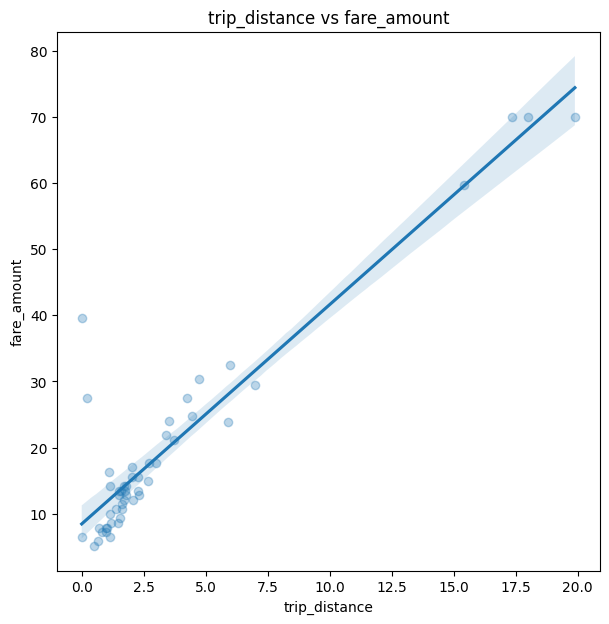

In [5]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

# Task 2 Reasoning for choices

### Introduction
In task 2, we had to make an exploratory data analysis on a dataset encompassing trip distances, fares, and passenger counts for yellow and green taxis. The approach to complete the task was formed from Cole Nussbaumer Knaflic's "Storytelling with Data," emphasizing clarity, precision, and efficiency in data visualization.

### Data Cleaning and Preparation
Before analyzing, it was found essential to clean the data, particularly focusing on removing outliers and invalid entries, as unfitting data points were found, negative distances and negative fares etc. To address this, records with zero or negative trip distances and fare amounts were removed. This step ensures that the analysis focuses on realistic and meaningful data points.

Further, a more robust outlier removal technique was applied using Interquartile Range (IQR). This method is effective in statistical analysis and involves calculating the IQR and then removing data points that lie beyond a specified multiplier of the IQR from the first and third quartiles. In this case, a multiplier of 3.75 was foudn to yield the best results, a strategic decision to balance between retaining sufficient data and removing extreme values.

### Data Visualization
**Histograms for Distribution Analysis**
Histograms were chosen to analyze the distribution of trip distances, fares, and passenger counts. This choice aligns with Knaflic’s emphasis on using appropriate visualizations to reveal the story within the data. Histograms are particularly effective for showing the distribution of a single variable and identifying common patterns like skewness or modality.

For trip distances and fares, separate histograms for yellow and green taxis provide a comparative view, enabling an understanding of how these variables differ between the two taxi types. Bin sizes for histograms were thoughtfully chosen, derived from the data's range, ensuring that each histogram accurately represents the distribution without being overly detailed or too generalized.

**Scatter Plots for Relationship Analysis**
To explore the relationship between trip distance and fare amount, scatter plots were chosen. As Knaflic advocates, scatter plots are ideal for depicting the relationship between two quantitative variables. The use of a sample of 100,000 records for each taxi type prevents over-cluttering, adhering to Knaflic’s principle of simplicity and clarity in visual representation, while still providing a true depiction of the entire dataset.

A linear trend line was added to each scatter plot, providing a visual indication of the relationship’s direction and strength. This addition enhances the interpretability of the scatter plot, offering a quick, visual summary of the relationship between trip distance and fare amount.

**Correlation Coefficients**
The analysis includes the calculation of correlation coefficients between trip distance and fare amount for both taxi types. This statistical measure quantifies the strength and direction of the linear relationship between the two variables, adding a numerical perspective to the visual analysis provided by the scatter plots. For further understanding of the dataset.

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

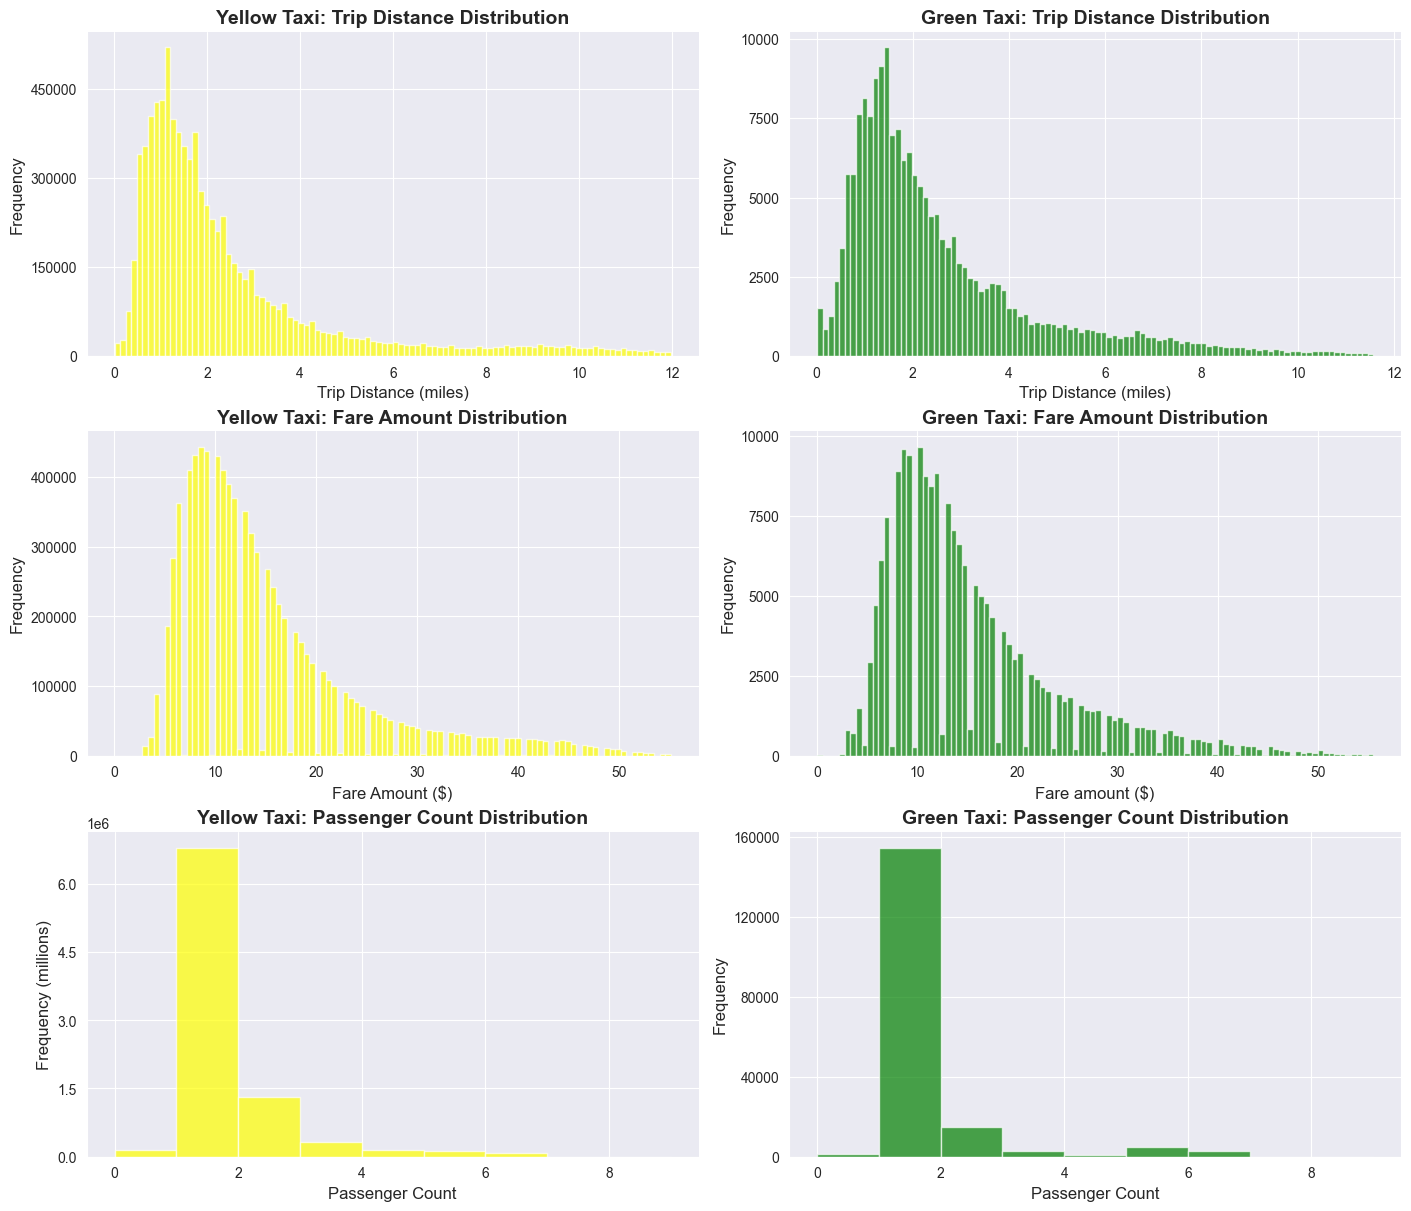

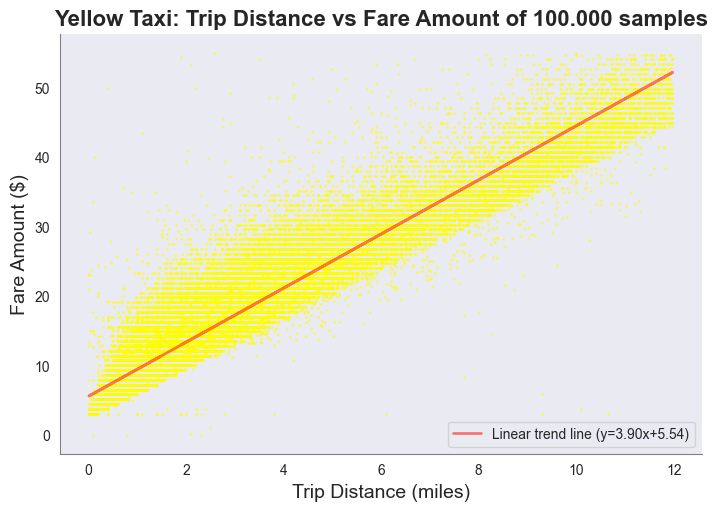

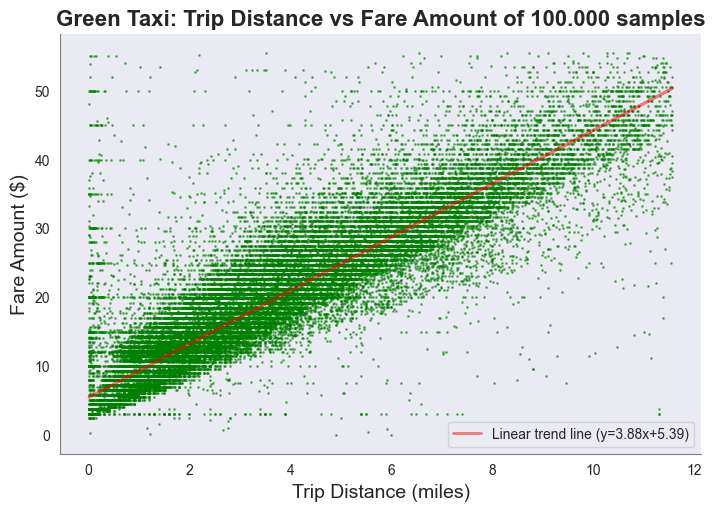

Yellow Taxi: Correlation coefficient between trip distance and fare amount of total dataset:
0.9512894789511283

Green Taxi: Correlation coefficient between trip distance and fare amount of total dataset:
0.9170049812516105


In [3]:
# Write your code
import matplotlib.pyplot as plt
from src.utils import *

# Remove records where trip_distance is 0 or negative
df_yellow_t2 = df_yellow[df_yellow['trip_distance'] > 0]
df_green_t2 = df_green[df_green['trip_distance'] > 0]

# Remove records where fare_amount is 0 or negative
df_yellow_t2 = df_yellow_t2[df_yellow_t2['fare_amount'] > 0]
df_green_t2 = df_green_t2[df_green_t2['fare_amount'] > 0]

# Clean the data for both yellow and green datasets
df_yellow_clean_t2 = remove_outliers(df_yellow_t2, 'trip_distance')
df_yellow_clean_t2 = remove_outliers(df_yellow_clean_t2, 'fare_amount')

df_green_clean_t2 = remove_outliers(df_green_t2, 'trip_distance')
df_green_clean_t2 = remove_outliers(df_green_clean_t2, 'fare_amount')

# 1. Analyzing the Distribution
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), constrained_layout=True)
plot_histogram(df_yellow_clean_t2, 'trip_distance', 'yellow', 'Yellow Taxi: Trip Distance Distribution', axes[0, 0], 'Trip Distance (miles)', 'Frequency')
plot_histogram(df_green_clean_t2, 'trip_distance', 'green', 'Green Taxi: Trip Distance Distribution', axes[0, 1], 'Trip Distance (miles)', 'Frequency')
plot_histogram(df_yellow_clean_t2, 'fare_amount', 'yellow', 'Yellow Taxi: Fare Amount Distribution', axes[1, 0], 'Fare Amount ($)', 'Frequency')
plot_histogram(df_green_clean_t2, 'fare_amount', 'green', 'Green Taxi: Fare Amount Distribution', axes[1, 1], 'Fare amount ($)', 'Frequency')

# For passenger count, we do not remove outliers since it's a discrete variable and generally doesn't have significant outliers
passenger_bins = np.arange(0, df_yellow_t2['passenger_count'].max() + 1, 1) # Bins for passenger count

plot_histogram(df_yellow_t2, 'passenger_count', 'yellow', 'Yellow Taxi: Passenger Count Distribution', axes[2, 0], 'Passenger Count', 'Frequency (millions)', passenger_bins)
plot_histogram(df_green_t2, 'passenger_count', 'green', 'Green Taxi: Passenger Count Distribution', axes[2, 1], 'Passenger Count', 'Frequency', passenger_bins)

# 2. Analyzing Relationships
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
plot_scatter(df_yellow_clean_t2.sample(100000), 'trip_distance', 'fare_amount', 'yellow', 'Yellow Taxi: Trip Distance vs Fare Amount of 100.000 samples', ax, 'Trip Distance (miles)', 'Fare Amount ($)') # Sample to not over clutter the scatter plot

fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
plot_scatter(df_green_clean_t2.sample(100000), 'trip_distance', 'fare_amount', 'green', 'Green Taxi: Trip Distance vs Fare Amount of 100.000 samples', ax, 'Trip Distance (miles)', 'Fare Amount ($)') # Sample to not over clutter the scatter plot

# Show plots
plt.show()

# Calculating Correlation Coefficients
print("Yellow Taxi: Correlation coefficient between trip distance and fare amount of total dataset:")
print(df_yellow_clean_t2[['trip_distance', 'fare_amount']].corr().iloc[0, 1])

print("\nGreen Taxi: Correlation coefficient between trip distance and fare amount of total dataset:")
print(df_green_clean_t2[['trip_distance', 'fare_amount']].corr().iloc[0, 1])

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

# Task 3 choices

We have in this task choses to use kepler. This is cause its an interaktiv map the user can use to visualise the data they have.
We have used kepler to viasulise the taxi trips onto a real map, where the lighter the color the more the trips in a route.

In [11]:
# Write your code
from src.utils import *
from keplergl import KeplerGl

# Remove unused columns
columns_to_keep = ['PULocationID', 'DOLocationID']
df_yellow_clean_t3 = df_yellow.loc[:, columns_to_keep]
df_green_clean_t3 = df_green.loc[:, columns_to_keep]

# Remove location who is over max locationID
df_yellow_clean_t3 = df_yellow_clean_t3[(df_yellow_clean_t3['PULocationID'] <= 263) & (df_yellow_clean_t3['DOLocationID'] <= 263)]
df_green_clean_t3 = df_green_clean_t3[(df_green_clean_t3['PULocationID'] <= 263) & (df_green_clean_t3['DOLocationID'] <= 263)]

# Make new data set to each picture
df_yellow_taxi = pd.DataFrame()
df_green_taxi = pd.DataFrame()

df_yellow_taxi = setUpDataToKepler(df_yellow_clean_t3, df_zones)
df_green_taxi = setUpDataToKepler(df_green_clean_t3, df_zones)

# remove unnecesseary small count trips
minium_trips_yellow = 3000
minium_trips_green = 75
df_yellow_taxi = df_yellow_taxi[(df_yellow_taxi['count'] >= minium_trips_yellow)]
df_green_taxi = df_green_taxi[(df_green_taxi['count'] >= minium_trips_green)]

# Make empty map
map = KeplerGl(height=600)

# Add data to the map
map.add_data(data=df_yellow_taxi, name='yellow_taxi')
map.add_data(data=df_green_taxi, name='green_taxi')

map.config = getKeplerconfig()
# Display a map where lighter-colored dots indicate higher activity levels
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'sr4d85f', 'type': …

As seen in the above visualization, we have shown the green taxi trips to the left and the yellow to the right. Further more have we needed to remove trips where the count is below 75 for green taxis and 3000 for yellow taxis. This is done to enhance data visualization, preventing too many lines from obscuring the view.

With this in mind, we can observe that yellow taxis have significantly more trips compared to green taxis, as indicated by the necessary cutoff values for visualization.

Furthermore, we can see that yellow taxis are primarily concentrated around intercity routes and the two local airports in New York. In contrast, green taxis are more locally focused on the outer parts of the city, catering to a greater number of local trips within New York.


In [8]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

### Task 4: Reasoning for choices and analysis

#### Introduction
In task 4, we had to make a temporal analysis of the patterns of taxi rides of both the yellow and green taxis in NYC. This analysis is done on the mentioned taxis for their trip count, average travel distance and fares over a different time frames, in this case hours, weekdays and months for both the yellow and green taxis.

The overall approach to this task as seen above is also done with Cole Nussbaumer Knaflic's "Storytelling with Data" principles for visual storytelling and data visualization.

#### Reasoning: Bar charts and Line graphs
##### Bar charts:
The use of bar charts to portray our data is because of the familiarity and easily approachable and understandable for the common user, this is a great tool of visualization as it is commonly used in many use cases, which is great as many if not all has an understanding on how to read and understand the chart.
##### Line graph:
The use of line graphs is a great tool to use as well in our case, since we want to portray a temporal analysis of the data where we work with a set of data over a given time frame. A line graph is great since it shows the connection between each point to show either a rise or fall in numbers over a given time span, but can also contain multiple lines representing other values which can easily be compared to one another.

#### Analysis of the data
##### Trip counts:
From the trip counts we can see that there are similarities in the patterns of the yellow and green taxis for their trip counts for each hour, weekdays and months though with some difference in greens max peaks, as green has a higher count in its peak hours, whereas yellows trip count is more stable in its curvature as seen in the plots below.

##### Average travel distance:
Now if we are looking at the average distance, there can be seen a clear difference in the amount of distance traveled as green taxis has a higher average traveled than yellow taxis. This difference can be seen in the hourly, weekdays and monthly charts where yellow is generally lower placed than green, this can be clearly given to the fact that green taxis primary goal is to give people in outer NYC easier access for taxis to travel into the inner city.

##### Average Fares:
Now looking at the average fares for the yellow and green taxi with the higher average travel distance discovered in the previous part, it can clearly be seen that the average distance also affects the fares which leads to green taxis having a higher average than yellow taxis in this department as well.

##### Conclusion of the temporal analysis:
To sum it all up, we can see that due to the fact that green taxis purpose is to give access for taxis as a transportation method for people in outer NYC, leads to a higher average travel distance and fares compared to yellow taxis.
It can also be seen that in the hourly timespan that there are few travels during the early mornings/nights from 1-6, and a steady curve for the trips thereafter with peaks at around 16 to 18 for travels, leading to a steady decline in travels as it  gets later into the night.


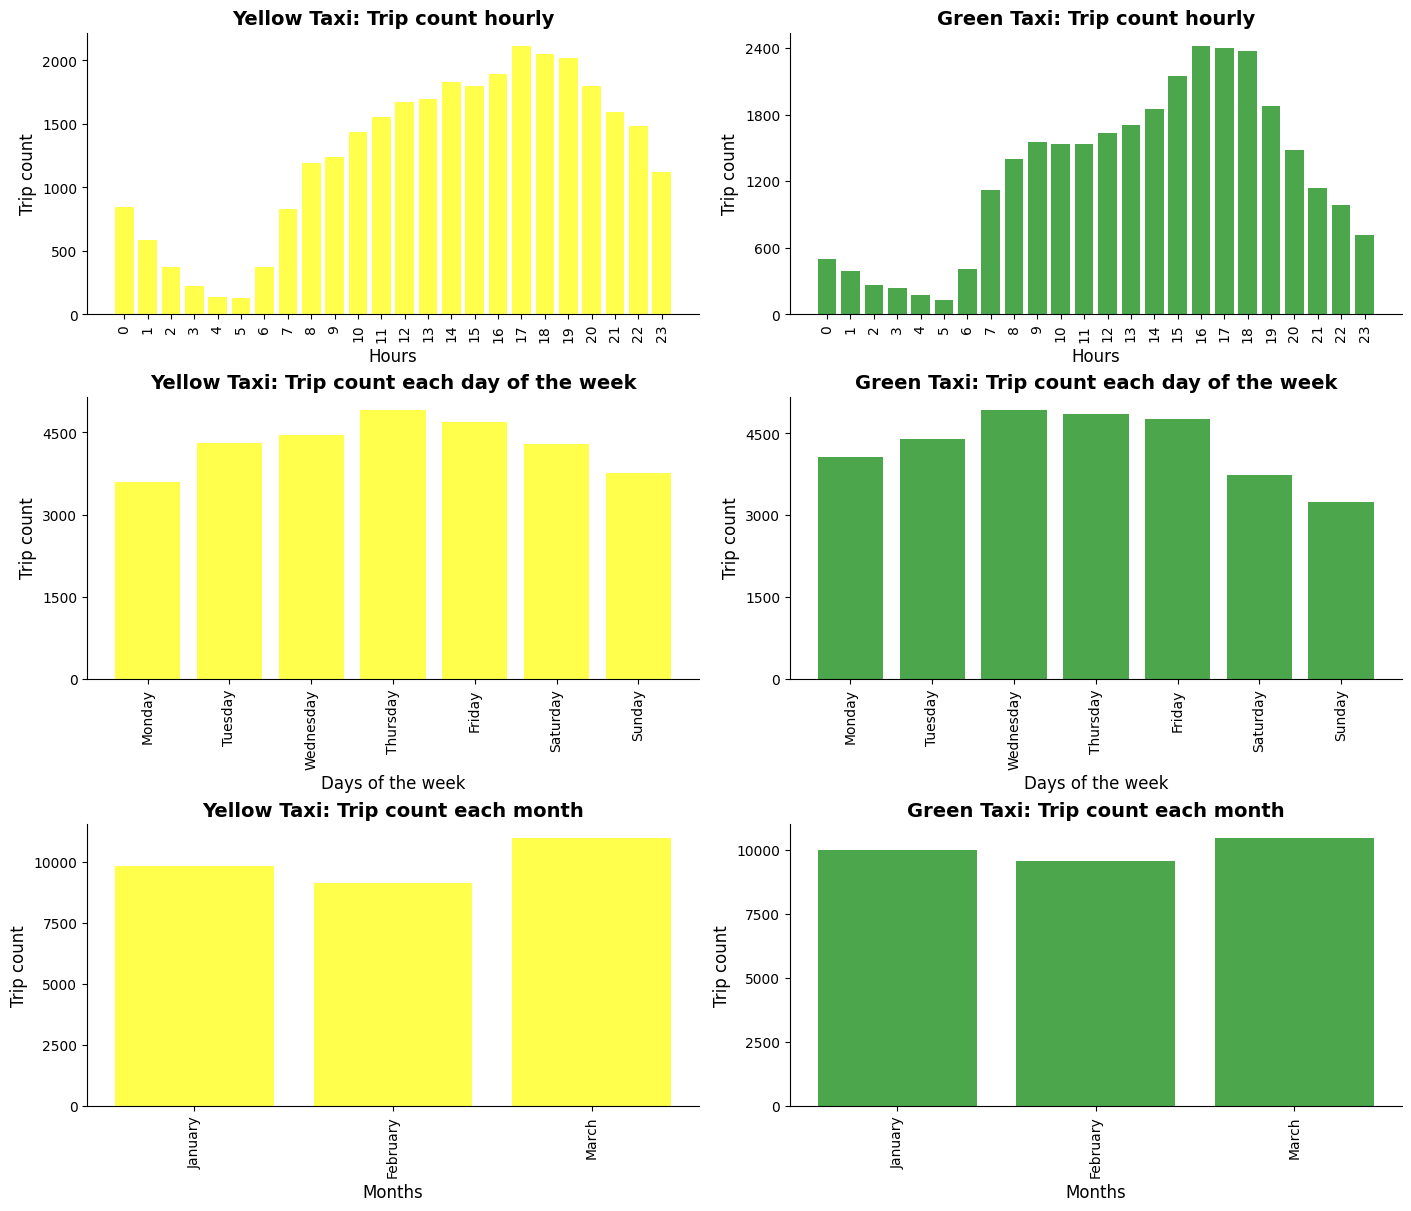

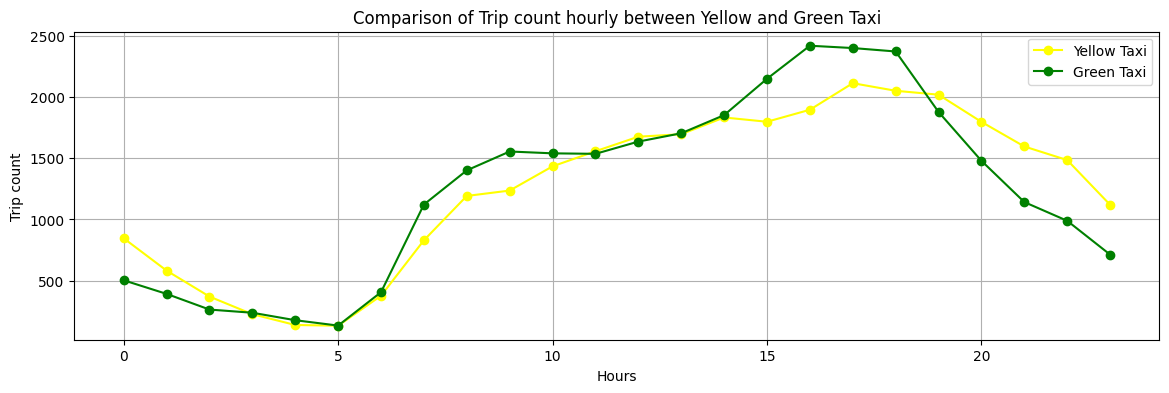

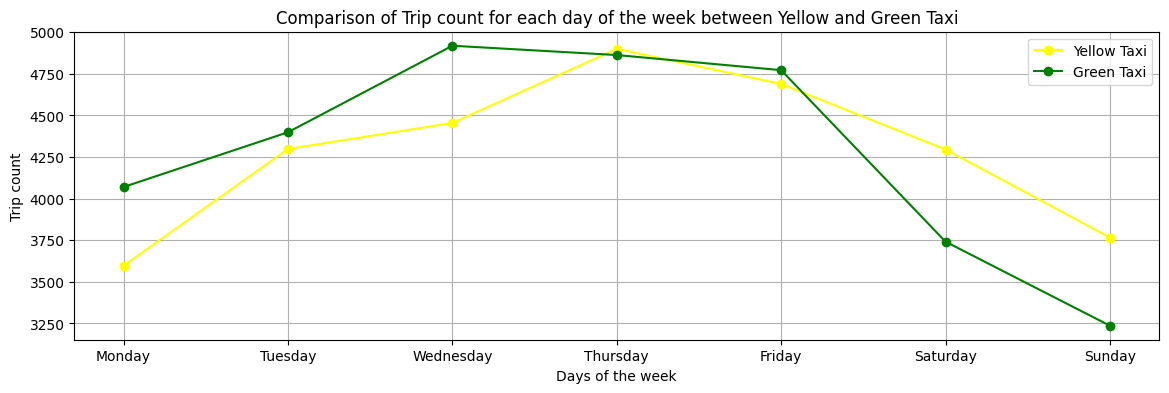

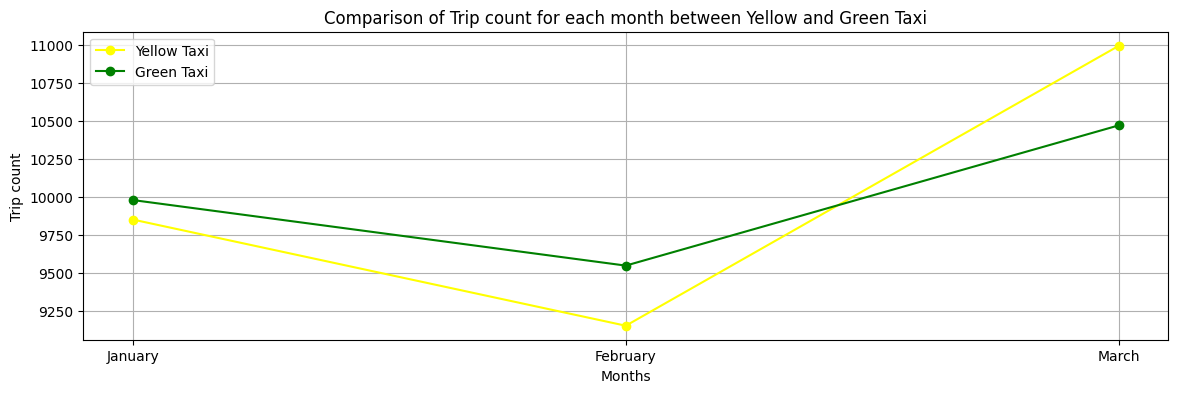

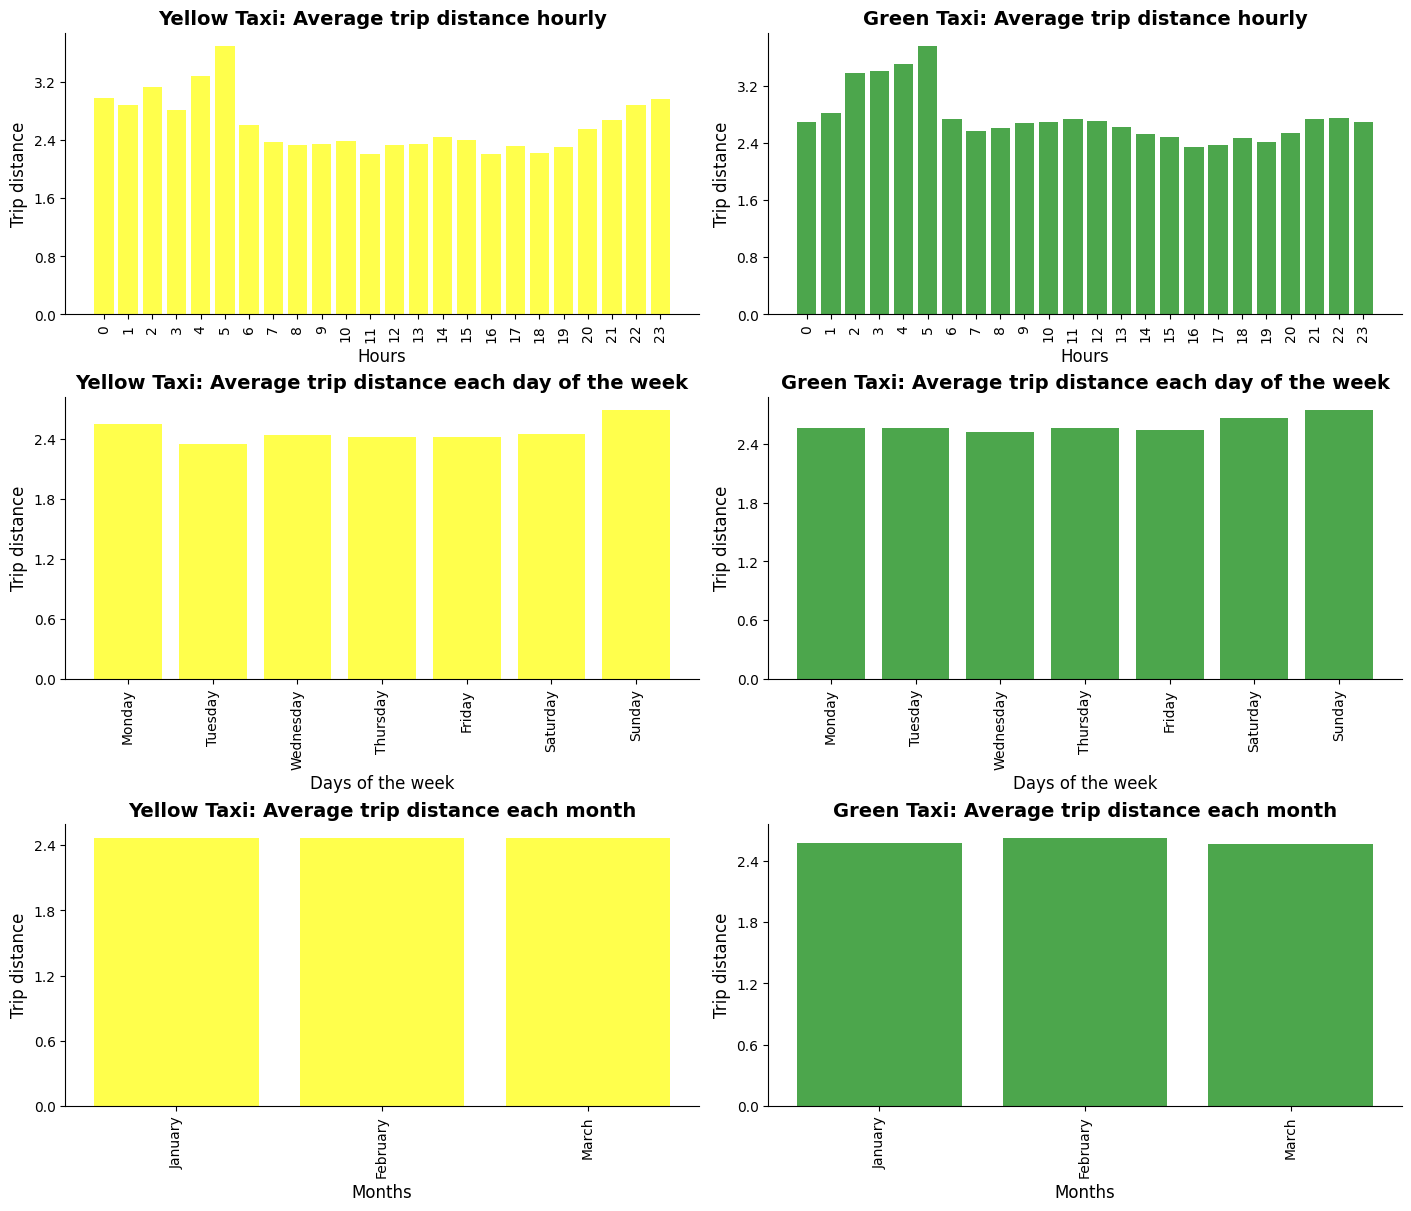

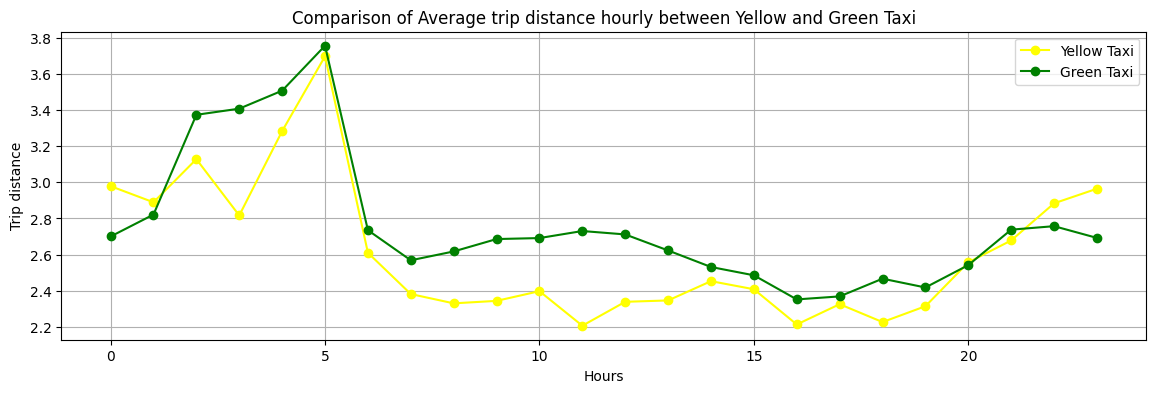

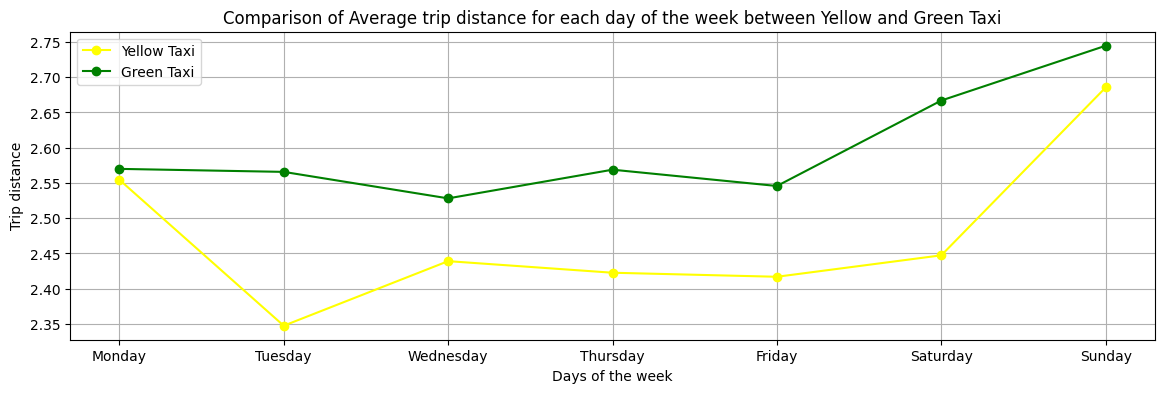

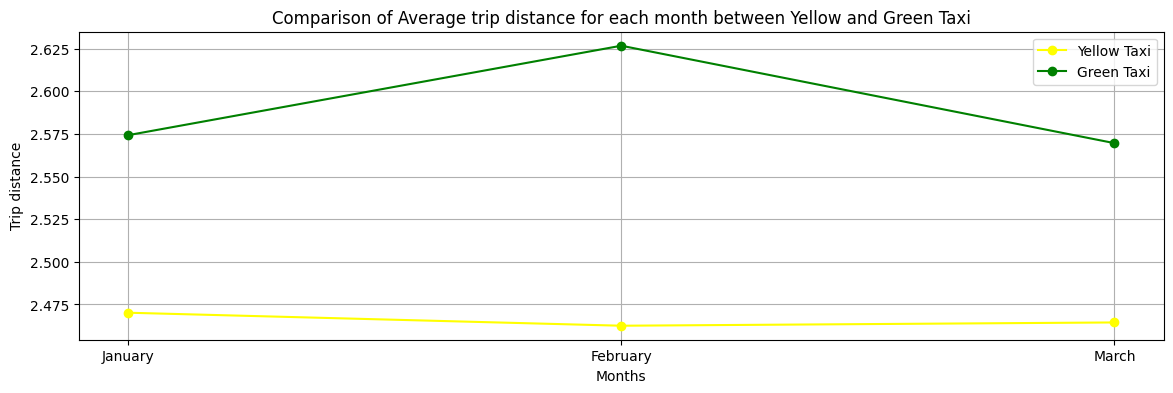

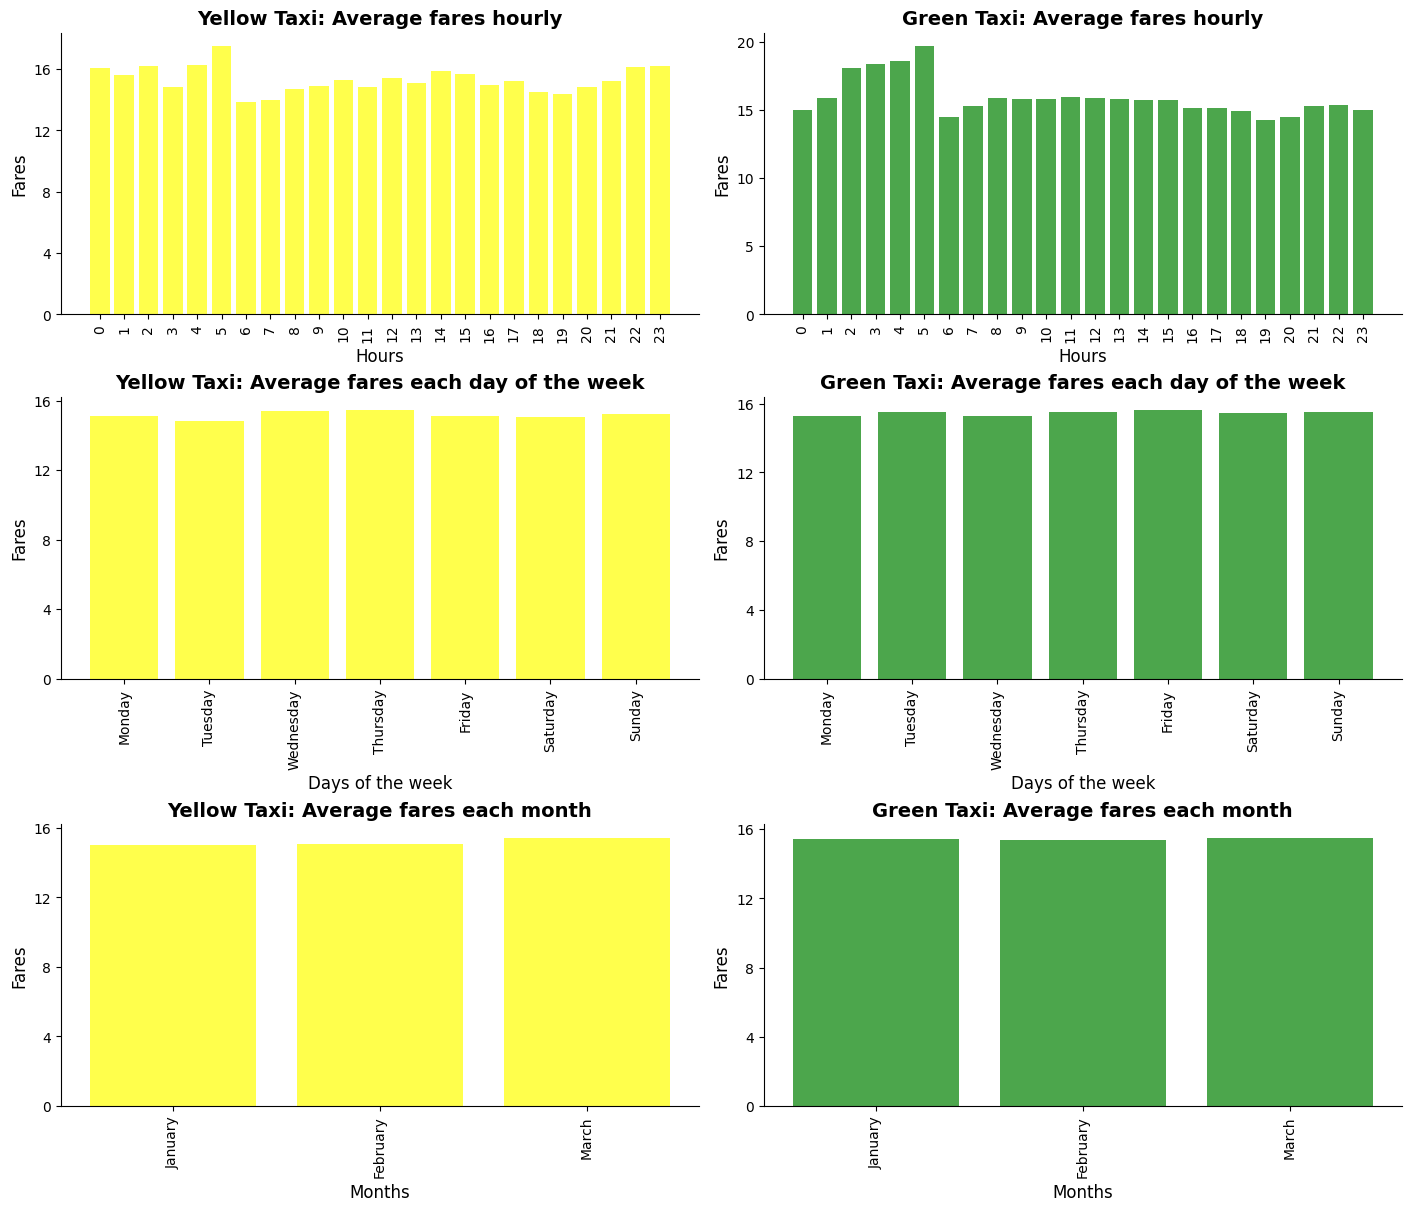

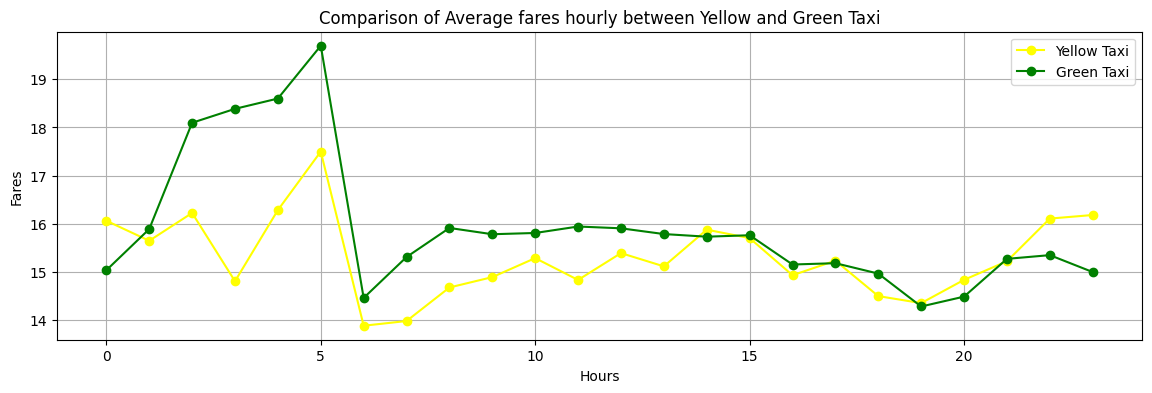

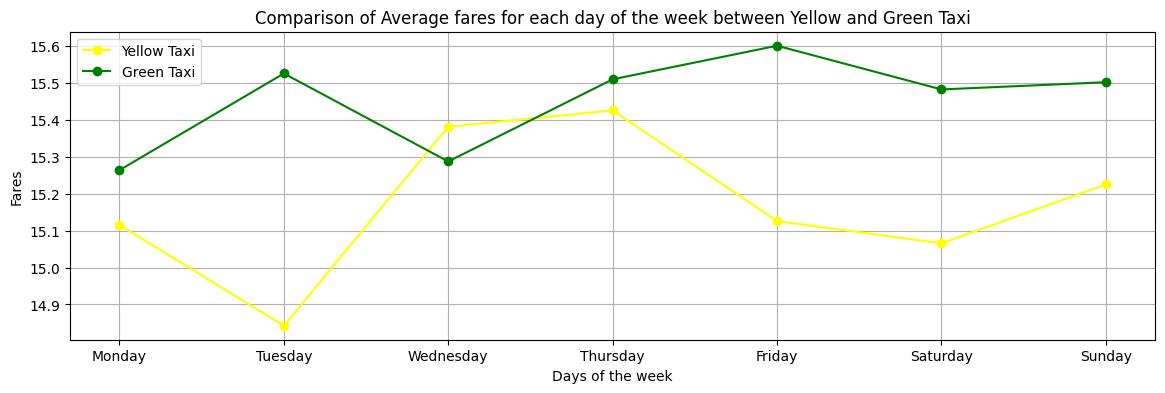

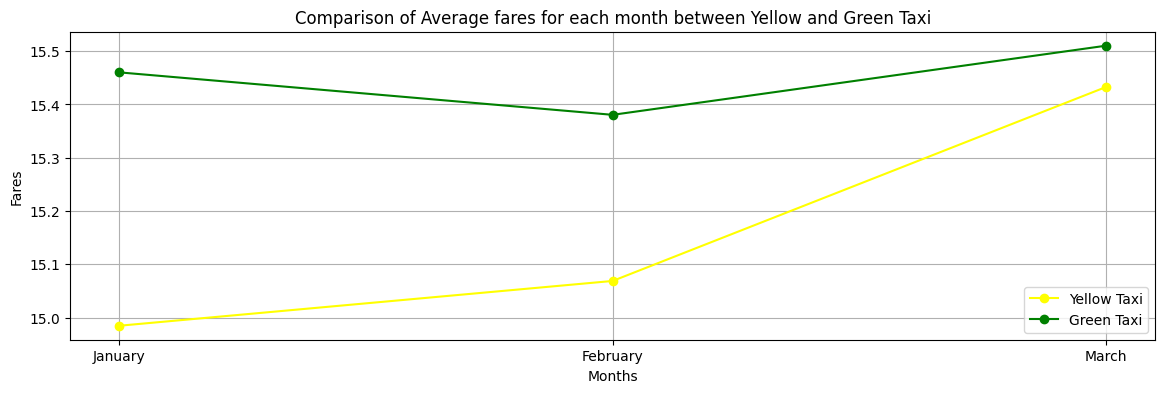

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import *

#Data Preparation
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
               7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

#Sample the data from the cleaned up data in task 2
df_yellow_clean_sample = prepare_data(df_yellow_clean_t2, "tpep_pickup_datetime", day_names, month_names)
df_green_clean_sample = prepare_data(df_green_clean_t2, "lpep_pickup_datetime", day_names, month_names)

#Group and Aggregate Data for Counts
yellow_hour_count = group_and_aggregate(df_yellow_clean_sample, "hour")
green_hour_count = group_and_aggregate(df_green_clean_sample, "hour")
yellow_day_count = group_and_aggregate(df_yellow_clean_sample, "day_name")
green_day_count = group_and_aggregate(df_green_clean_sample, "day_name")
yellow_month_count = group_and_aggregate(df_yellow_clean_sample, "month")
green_month_count = group_and_aggregate(df_green_clean_sample, "month")

#Group and Aggregate Data for Means
yellow_hour_trip_dist_mean = group_and_aggregate(df_yellow_clean_sample, "hour", "trip_distance", 'mean')
green_hour_trip_dist_mean = group_and_aggregate(df_green_clean_sample, "hour", "trip_distance", 'mean')
yellow_day_trip_dist_mean = group_and_aggregate(df_yellow_clean_sample, "day_name", "trip_distance", 'mean')
green_day_trip_dist_mean = group_and_aggregate(df_green_clean_sample, "day_name", "trip_distance", 'mean')
yellow_month_trip_dist_mean = group_and_aggregate(df_yellow_clean_sample, "month", "trip_distance", 'mean')
green_month_trip_dist_mean = group_and_aggregate(df_green_clean_sample, "month", "trip_distance", 'mean')
yellow_hour_fares_mean = group_and_aggregate(df_yellow_clean_sample, "hour", "fare_amount", 'mean')
green_hour_fares_mean = group_and_aggregate(df_green_clean_sample, "hour", "fare_amount", 'mean')
yellow_day_fares_mean = group_and_aggregate(df_yellow_clean_sample, "day_name", "fare_amount", 'mean')
green_day_fares_mean = group_and_aggregate(df_green_clean_sample, "day_name", "fare_amount", 'mean')
yellow_month_fares_mean = group_and_aggregate(df_yellow_clean_sample, "month", "fare_amount", 'mean')
green_month_fares_mean = group_and_aggregate(df_green_clean_sample, "month", "fare_amount", 'mean')

#Now we can insert the data in the plot like in the previous part of the task, now we put in our data for fares.

#Plots for time compared with trip count for yellow and green taxis
#Put the plots side by side in columns.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), layout="constrained")

#Bar plot for the hourly splits for both yellow and green taxis
plot_histogram_2_values(axes[0, 0], yellow_hour_count["hour"], yellow_hour_count["count"], "yellow", "Yellow Taxi: Trip count hourly", "Hours", "Trip count")
plot_histogram_2_values(axes[0, 1], green_hour_count["hour"], green_hour_count["count"], "green", "Green Taxi: Trip count hourly", "Hours", "Trip count")
#Bar plot for the daily splits for both yellow and green taxis
plot_histogram_2_values(axes[1, 0], yellow_day_count["day_name"], yellow_day_count["count"], "yellow", "Yellow Taxi: Trip count each day of the week", "Days of the week", "Trip count")
plot_histogram_2_values(axes[1, 1], green_day_count["day_name"], green_day_count["count"], "green", "Green Taxi: Trip count each day of the week", "Days of the week", "Trip count")
#Bar plot for the monthly splits for both yellow and green taxis
plot_histogram_2_values(axes[2, 0], yellow_month_count["month"], yellow_month_count["count"], "yellow", "Yellow Taxi: Trip count each month", "Months", "Trip count", month_names)
plot_histogram_2_values(axes[2, 1], green_month_count["month"], green_month_count["count"], "green", "Green Taxi: Trip count each month", "Months", "Trip count", month_names)

#Now to compare the two results in a better way by comparing them in one plot.

#Create a line plot for trip count per hour for both the yellow and green taxi.
plot_line_comparison(yellow_hour_count["hour"], yellow_hour_count["count"], green_hour_count["hour"], green_hour_count["count"], "Hours", "Trip count", "Comparison of Trip count hourly between Yellow and Green Taxi")
#Create a line plot for trip count for each day of the week for both the yellow and green taxi.
plot_line_comparison(yellow_day_count["day_name"], yellow_day_count["count"], green_day_count["day_name"], green_day_count["count"], "Days of the week", "Trip count", "Comparison of Trip count for each day of the week between Yellow and Green Taxi")
#Create a line plot for trip count for each month for both the yellow and green taxi.
plot_line_comparison(yellow_month_count["month"], yellow_month_count["count"], green_month_count["month"], green_month_count["count"], "Months", "Trip count", "Comparison of Trip count for each month between Yellow and Green Taxi", month_names)


#Plots for time compared with trip distance for yellow and green taxis
#Put the plots side by side in columns.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), layout="constrained")

#Bar plot for the hourly splits for both yellow and green taxis
plot_histogram_2_values(axes[0, 0], yellow_hour_trip_dist_mean["hour"], yellow_hour_trip_dist_mean["trip_distance_mean"], "yellow", "Yellow Taxi: Average trip distance hourly", "Hours", "Trip distance")
plot_histogram_2_values(axes[0, 1], green_hour_trip_dist_mean["hour"], green_hour_trip_dist_mean["trip_distance_mean"], "green", "Green Taxi: Average trip distance hourly", "Hours", "Trip distance")
#Bar plot for the daily splits for both yellow and green taxis
plot_histogram_2_values(axes[1, 0], yellow_day_trip_dist_mean["day_name"], yellow_day_trip_dist_mean["trip_distance_mean"], "yellow", "Yellow Taxi: Average trip distance each day of the week", "Days of the week", "Trip distance")
plot_histogram_2_values(axes[1, 1], green_day_trip_dist_mean["day_name"], green_day_trip_dist_mean["trip_distance_mean"], "green", "Green Taxi: Average trip distance each day of the week", "Days of the week", "Trip distance")
#Bar plot for the monthly splits for both yellow and green taxis
plot_histogram_2_values(axes[2, 0], yellow_month_trip_dist_mean["month"], yellow_month_trip_dist_mean["trip_distance_mean"], "yellow", "Yellow Taxi: Average trip distance each month", "Months", "Trip distance", month_names)
plot_histogram_2_values(axes[2, 1], green_month_trip_dist_mean["month"], green_month_trip_dist_mean["trip_distance_mean"], "green", "Green Taxi: Average trip distance each month", "Months", "Trip distance", month_names)

#Now to compare the two results in a better way by comparing them in one plot.

#Create a line plot for average trip distance per hour for both the yellow and green taxi.
plot_line_comparison(yellow_hour_trip_dist_mean["hour"], yellow_hour_trip_dist_mean["trip_distance_mean"], green_hour_trip_dist_mean["hour"], green_hour_trip_dist_mean["trip_distance_mean"], "Hours", "Trip distance", "Comparison of Average trip distance hourly between Yellow and Green Taxi")
#Create a line plot for average trip distance for each day of the week for both the yellow and green taxi.
plot_line_comparison(yellow_day_trip_dist_mean["day_name"], yellow_day_trip_dist_mean["trip_distance_mean"], green_day_trip_dist_mean["day_name"], green_day_trip_dist_mean["trip_distance_mean"], "Days of the week", "Trip distance", "Comparison of Average trip distance for each day of the week between Yellow and Green Taxi")
#Create a line plot for average trip distance for each month for both the yellow and green taxi.
plot_line_comparison(yellow_month_trip_dist_mean["month"], yellow_month_trip_dist_mean["trip_distance_mean"], green_month_trip_dist_mean["month"], green_month_trip_dist_mean["trip_distance_mean"], "Months", "Trip distance", "Comparison of Average trip distance for each month between Yellow and Green Taxi", month_names)


#Plots for time compared with fares for yellow and green taxis
#Put the plots side by side in columns.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), layout="constrained")

#Bar plot for the hourly splits for both yellow and green taxis
plot_histogram_2_values(axes[0, 0], yellow_hour_fares_mean["hour"], yellow_hour_fares_mean["fare_amount_mean"], "yellow", "Yellow Taxi: Average fares hourly", "Hours", "Fares")
plot_histogram_2_values(axes[0, 1], green_hour_fares_mean["hour"], green_hour_fares_mean["fare_amount_mean"], "green", "Green Taxi: Average fares hourly", "Hours", "Fares")
#Bar plot for the daily splits for both yellow and green taxis
plot_histogram_2_values(axes[1, 0], yellow_day_fares_mean["day_name"], yellow_day_fares_mean["fare_amount_mean"], "yellow", "Yellow Taxi: Average fares each day of the week", "Days of the week", "Fares")
plot_histogram_2_values(axes[1, 1], green_day_fares_mean["day_name"], green_day_fares_mean["fare_amount_mean"], "green", "Green Taxi: Average fares each day of the week", "Days of the week", "Fares")
#Bar plot for the monthly splits for both yellow and green taxis
plot_histogram_2_values(axes[2, 0], yellow_month_fares_mean["month"], yellow_month_fares_mean["fare_amount_mean"], "yellow", "Yellow Taxi: Average fares each month", "Months", "Fares", month_names)
plot_histogram_2_values(axes[2, 1], green_month_fares_mean["month"], green_month_fares_mean["fare_amount_mean"], "green", "Green Taxi: Average fares each month", "Months", "Fares", month_names)

#Now to compare the two results in a better way by comparing them in one plot.

#Create a line plot for fares per hour for both the yellow and green taxi.
plot_line_comparison(yellow_hour_fares_mean["hour"], yellow_hour_fares_mean["fare_amount_mean"], green_hour_fares_mean["hour"], green_hour_fares_mean["fare_amount_mean"], "Hours", "Fares", "Comparison of Average fares hourly between Yellow and Green Taxi")
#Create a line plot for fares for each day of the week for both the yellow and green taxi.
plot_line_comparison(yellow_day_fares_mean["day_name"], yellow_day_fares_mean["fare_amount_mean"], green_day_fares_mean["day_name"], green_day_fares_mean["fare_amount_mean"], "Days of the week", "Fares", "Comparison of Average fares for each day of the week between Yellow and Green Taxi")
#Create a line plot for fares for each month for both the yellow and green taxi.
plot_line_comparison(yellow_month_fares_mean["month"], yellow_month_fares_mean["fare_amount_mean"], green_month_fares_mean["month"], green_month_fares_mean["fare_amount_mean"], "Months", "Fares", "Comparison of Average fares for each month between Yellow and Green Taxi", month_names)

#Show the plot
plt.show()

# Task 5 Reasoning for choices

### Introduction
In Task 5, the objective was to use time-series forecasting to predict the number of taxi rides for yellow and green taxis. This process involved utilizing Facebook's Prophet forecasting tool due to its robustness and ease of use for time-series data. Prophet works well with daily observations that display patterns of growth that are not linear and that may have complex seasonality.

### Data Preparation
Prior to forecasting, data from Task 2 was utilized, ensuring the time-series analysis would be based on cleaned and preprocessed data. The datasets were converted to a datetime format and indexed accordingly to align with Prophet's requirements. Additionally, the data was resampled by day to provide a daily forecast, which is a common practice in time-series analysis to capture daily trends and seasonality.

### Model Configuration
The Prophet models were configured with yearly seasonality enabled and weekly seasonality disabled, based on the assumption that taxi rides would likely exhibit significant yearly seasonality patterns but not necessarily on a weekly basis. Daily seasonality was also turned off due to the data being aggregated on a daily basis; thus, intraday patterns were not present.

### Forecast
The models were trained on historical data, and forecasts were generated for 150 days into the future. This period was chosen to provide a balance between a long-term outlook and maintaining forecast reliability. The choice of 150 days also allows for capturing seasonal trends without going too far into the future where the model's predictions could become less certain.

### Model Validation
Cross-validation was performed with Prophet's built-in functions to assess model performance. The parameters for the initial training period, horizon, and period between forecasts were chosen to balance computational efficiency with forecast granularity. The metric 'mape' (mean absolute percentage error) was used for its interpretability as a percentage, allowing for an intuitive understanding of the average error rate.

### Visualization
Prophet's plotting functions were used to visualize the forecasts and their components. These visualizations are crucial for communicating the results to stakeholders and for performing a qualitative check of the model's behavior.

### Conclusion
Through careful preparation of the data, appropriate model configuration, and thorough validation, Task 5 aligns with the principles of effective and responsible forecasting. The approach taken ensures that the predictions are based on robust statistical methods, providing actionable insights into future taxi ride trends.

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

00:48:41 - cmdstanpy - INFO - Chain [1] start processing
00:48:41 - cmdstanpy - INFO - Chain [1] done processing
00:48:41 - cmdstanpy - INFO - Chain [1] start processing
00:48:41 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

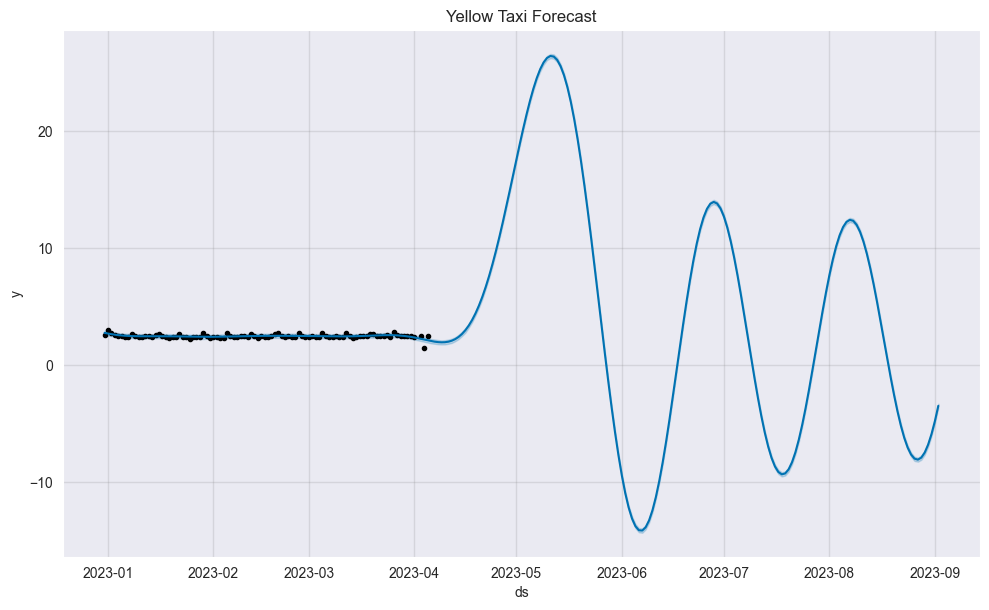

<Figure size 640x480 with 0 Axes>

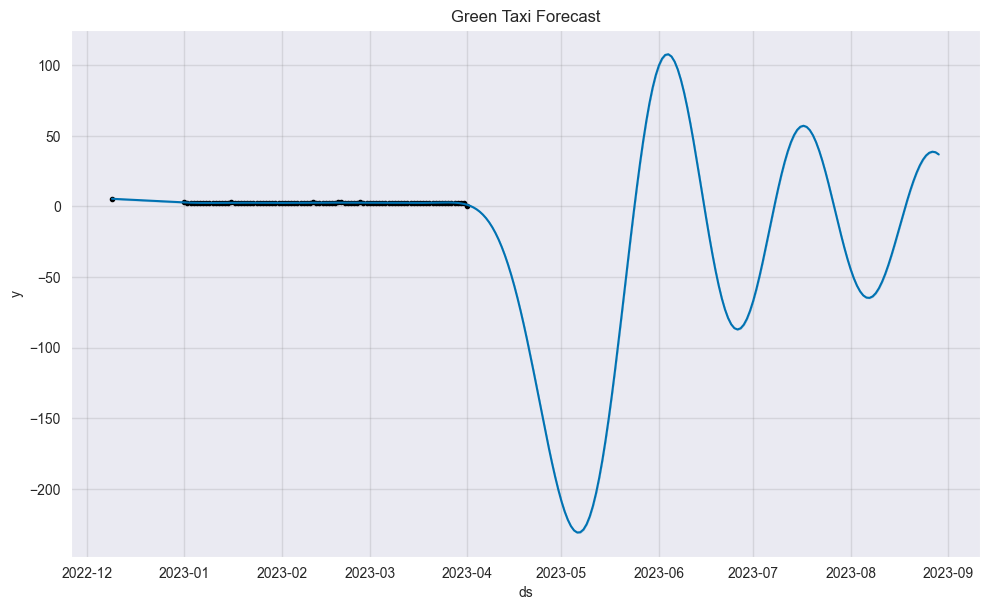

<Figure size 640x480 with 0 Axes>

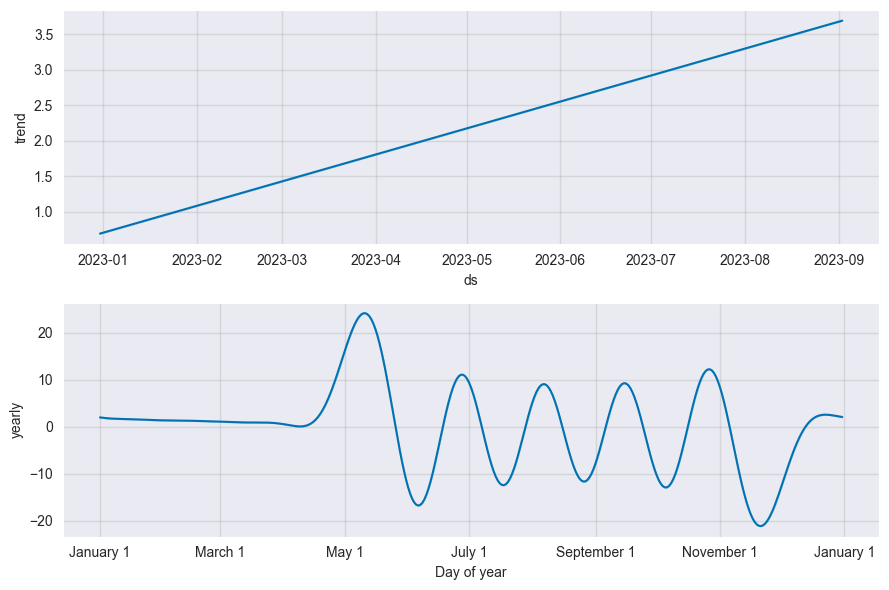

<Figure size 640x480 with 0 Axes>

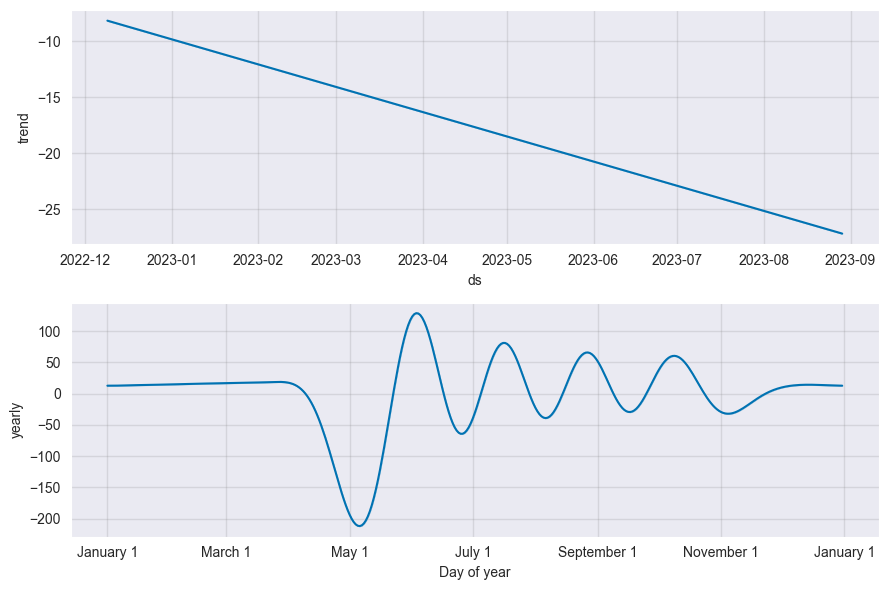

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

00:48:43 - cmdstanpy - INFO - Chain [1] start processing
00:48:44 - cmdstanpy - INFO - Chain [1] done processing
00:48:44 - cmdstanpy - INFO - Chain [1] start processing
00:48:44 - cmdstanpy - INFO - Chain [1] done processing
00:48:44 - cmdstanpy - INFO - Chain [1] start processing
00:48:44 - cmdstanpy - INFO - Chain [1] done processing


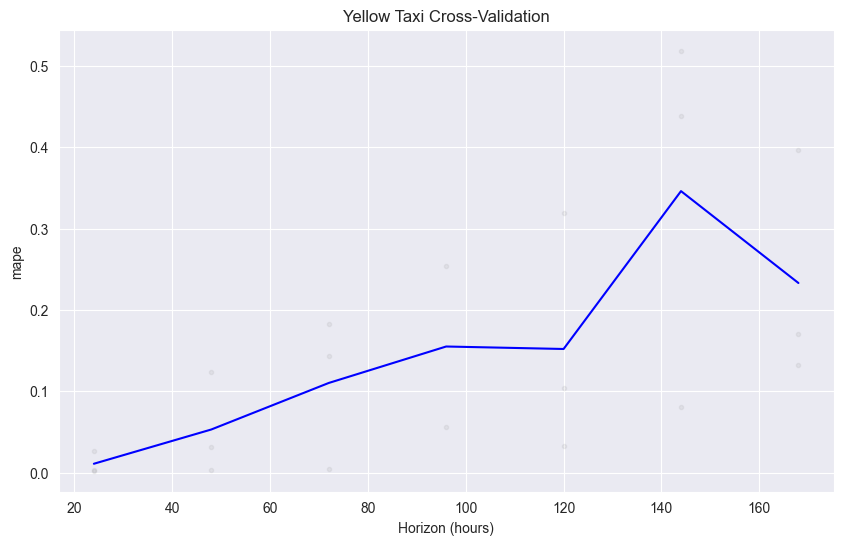

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

00:48:45 - cmdstanpy - INFO - Chain [1] start processing
00:48:45 - cmdstanpy - INFO - Chain [1] done processing
00:48:45 - cmdstanpy - INFO - Chain [1] start processing
00:48:45 - cmdstanpy - INFO - Chain [1] done processing
00:48:46 - cmdstanpy - INFO - Chain [1] start processing
00:48:46 - cmdstanpy - INFO - Chain [1] done processing
00:48:46 - cmdstanpy - INFO - Chain [1] start processing
00:48:46 - cmdstanpy - INFO - Chain [1] done processing
00:48:46 - cmdstanpy - INFO - Chain [1] start processing
00:48:47 - cmdstanpy - INFO - Chain [1] done processing


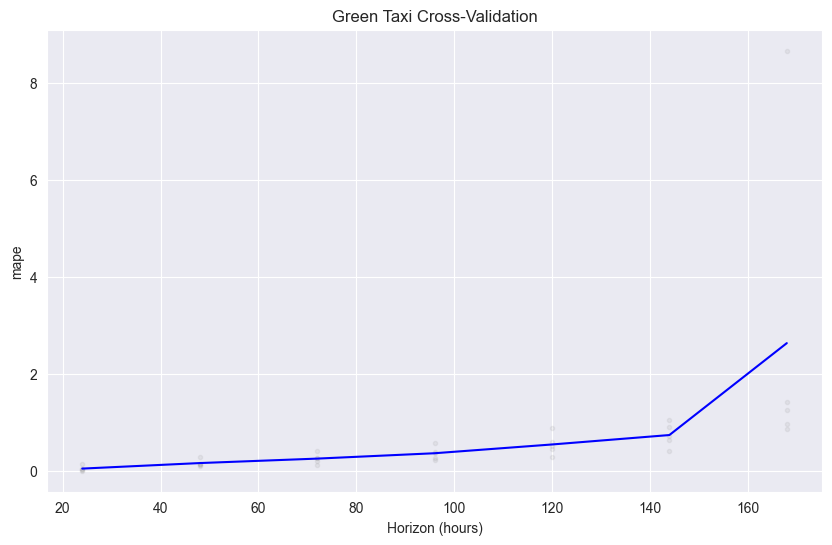

In [17]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import numpy as np
import matplotlib.pyplot as plt

#Sample the data from the cleaned up data in task 2
df_yellow_t5 = df_yellow_clean_t2
df_green_t5 = df_green_clean_t2

# Convert to datetime and sort the dataframes
df_yellow_t5['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_t5['tpep_pickup_datetime'])
df_green_t5['lpep_pickup_datetime'] = pd.to_datetime(df_green_t5['lpep_pickup_datetime'])
df_yellow_t5 = df_yellow_t5.set_index('tpep_pickup_datetime')
df_green_t5 = df_green_t5.set_index('lpep_pickup_datetime')

# Slice the dataset to the most recent month of data
most_recent_date = max(df_yellow_t5.index.max(), df_green_t5.index.max())
three_months_ago = most_recent_date - pd.Timedelta(days=150)

df_yellow_t5 = df_yellow_t5[df_yellow_t5.index > three_months_ago]
df_green_t5 = df_green_t5[df_green_t5.index > three_months_ago]

# Aggregate data by day
df_yellow_daily = df_yellow_t5['trip_distance'].resample('D').mean().reset_index()
df_green_daily = df_green_t5['trip_distance'].resample('D').mean().reset_index()

# Rename columns to fit Prophet requirements
df_yellow_daily.columns = ['ds', 'y']
df_green_daily.columns = ['ds', 'y']

# Initialize Prophet models
model_yellow = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_green = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Fit the models on the training data
model_yellow.fit(df_yellow_daily)
model_green.fit(df_green_daily)

# Create future dataframes for predictions
future_yellow = model_yellow.make_future_dataframe(periods=150)
future_green = model_green.make_future_dataframe(periods=150)

# Make predictions
forecast_yellow = model_yellow.predict(future_yellow)
forecast_green = model_green.predict(future_green)

# Plot the forecasts
plt.figure()
model_yellow.plot(forecast_yellow, uncertainty=True)
plt.title('Yellow Taxi Forecast')
plt.show()

plt.figure()
model_green.plot(forecast_green, uncertainty=True)
plt.title('Green Taxi Forecast')
plt.show()

# Plot the forecast components
plt.figure()
model_yellow.plot_components(forecast_yellow)
plt.show()

plt.figure()
model_green.plot_components(forecast_green)
plt.show()

# Perform and plot cross-validation
df_cv_yellow = cross_validation(model_yellow, initial='60 days', period='10 days', horizon='7 days')
df_p_yellow = performance_metrics(df_cv_yellow)
fig = plot_cross_validation_metric(df_cv_yellow, metric='mape')
plt.title("Yellow Taxi Cross-Validation")
plt.show()

df_cv_green = cross_validation(model_green, initial='60 days', period='10 days', horizon='7 days')
df_p_green = performance_metrics(df_cv_green)
fig2 = plot_cross_validation_metric(df_cv_green, metric='mape')
plt.title("Green Taxi Cross-Validation")
plt.show()


### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.